In [1]:
import sys
import os
from datetime import datetime
import json
import shutil
import random
import ast
import numpy as np
import pandas as pd
#import tensorflow as tf
#from tensorflow import keras
from tqdm import tqdm_notebook, tqdm
from matplotlib import pyplot as plt
import ast

In [2]:
training_folder = ['/home/jovyan/ai_trader/data/20230425_090605/DQN_trial_0', '/home/jovyan/ai_trader/data/20230425_092955/DQN_trial_1', '/home/jovyan/ai_trader/data/20230425_095354/DQN_trial_2']

In [44]:
path_to_folders = '../data/20230425_095354/'
trial_name = "DQN_trial_2"
all_df = []
r_funcs = []
filenames = []

data = json.load(open(os.path.join(path_to_folders, trial_name, 'params.json')))
r_funcs.append(data['reward_function'])
# for i, filename in enumerate(os.listdir(os.path.join(path_to_folders, trial_name))):

path_to_episode_files = os.path.join(path_to_folders, trial_name, "episodes")
files = os.listdir(path_to_episode_files)
li = []
for file in files:
    df = pd.read_csv(os.path.join(path_to_episode_files, file), sep=";", index_col=None, header=0)
    li.append(df)
ep_frame = pd.concat(li, axis=0, ignore_index=True)

files = os.listdir(os.path.join(path_to_folders, trial_name))
li = []
for filename in files:
    if filename.endswith(".csv"):
        df = pd.read_csv(os.path.join(path_to_folders, trial_name, filename), sep=";", index_col=None, header=0)
        li.append(df)
train_frame = pd.concat(li, axis=0, ignore_index=True)



#dfep = pd.read_csv(f'/Users/samuelharck/Desktop/Projekt/ai_trader/data/20230328_180031/DRL_trial_0/Epi_1_run_1.csv')

In [45]:
ep_frame.head()

,short_wallet,buy_short_count,funding_rate,buy_long_count,episode,btc_eur,money,sell_long_count,sell_short_count,short_units,...,long_position,short_eur,action,done,state,product_price,reward,btc_price,btc_units,short_position
0,"[0, 0]",0,0,0,8,0,[10000],0,0,0,...,0.0,-0.0,[0],False,[[[0.5 1. 0.5 0.5 ...,36501.45,-0.0,36501.45,0,-0.0
1,"[0, 0]",0,0,1,8,[9990.00999001],[0.],0,0,0,...,1.0,-0.0,[1.],False,[[[5.00000000e-01 1.00000000e+00 5.00000000e-0...,36417.85,[0.23482691],36417.85,[0.2743163],-0.0
2,"[0, 0]",0,0,1,8,0.0,[9977.63],1,0,0,...,0.0,-0.0,[0.],False,[[[5.00000000e-01 1.00000000e+00 5.00000000e-0...,36409.12,[0.23754231],36409.12,0.0,-0.0
3,"[0, 0]",0,0,2,8,[9967.66233766],[0.],1,0,0,...,1.0,-0.0,[1.],False,[[[5.00000000e-01 1.00000000e+00 5.00000000e-0...,36374.94,[0.23485195],36374.94,[0.27402553],-0.0
4,"[0, 0]",0,0,2,8,[9967.66233766],[0.],1,0,0,...,1.0,-0.0,[1.],False,[[[5.00000000e-01 1.00000000e+00 5.00000000e-0...,36371.94,[0.23677058],36371.94,[0.27402553],-0.0


In [46]:
train_frame.head()

,episode,run,action,dqn_action,state,reward,done,epsilon,profit,time_elapsed
0,2.0,1.0,[0.250956 0.25045145 0.24764812 0.2509444 ],[0],[[[5.00000000e-01 3.83321648e-09 5.00000000e-0...,-0.0,0.0,0.438905,0.00,467.869728
1,2.0,1.0,[0.2508542 0.25035366 0.24790677 0.2508854 ],[0.],[[[5.00000000e-01 3.83321648e-09 5.00000000e-0...,0.004363669854508423,0.0,0.438905,0.00,468.231710
2,2.0,1.0,[0.1633448 0.33788203 0.21443019 0.28434298],[0.5],[[[5.00000000e-01 3.83321648e-09 5.00000000e-0...,[0.23667837],0.0,0.438905,-5.00,468.399269
3,2.0,1.0,[0.28309345 0.29864968 0.22862746 0.1896294 ],[0.5],[[[5.00000000e-01 3.83321648e-09 5.00000000e-0...,[0.25265654],0.0,0.438905,9.71,468.567181
4,2.0,1.0,[0.2279736 0.25254233 0.22068162 0.29880245],[0.],[[[5.00000000e-01 3.83321648e-09 5.00000000e-0...,[0.23912318],0.0,0.438905,-1.84,468.767594


In [47]:
r_funcs

['reward_profit']

In [48]:
# Pick Episode
ep=2

<ipython-input-49-1b7a00abe018>:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = [np.fromstring(x[1:-1], dtype=np.float, sep=' ') for x  in ep_frame.reward]


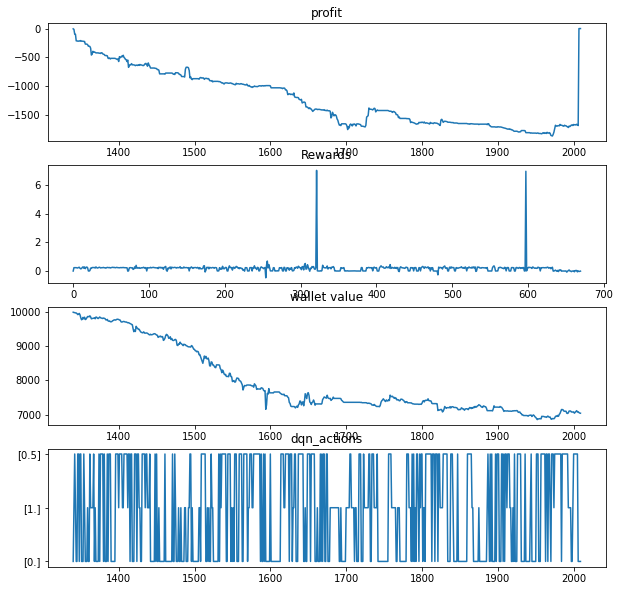

In [49]:
fig, ax = plt.subplots(4,1, figsize=(10,10))
ax[3].plot(train_frame.dqn_action[ep*670:(ep+1)*670])
ax[3].set_title("dqn_actions")

ax[0].plot(train_frame.profit[ep*670:(ep+1)*670])
ax[0].set_title("profit")

y = [np.fromstring(x[1:-1], dtype=np.float, sep=' ') for x  in ep_frame.reward]
# y= train_frame.reward
ax[1].plot(y[ep*670:(ep+1)*670])
ax[1].set_title("Rewards")
ax[2].plot(ep_frame.wallet_value[ep*670:(ep+1)*670])
ax[2].set_title("wallet value")
plt.show()


<ipython-input-33-6c3121c49728>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  tmp = [np.fromstring(n[1:-1], dtype=np.float, sep=' ')  for n in train_frame["dqn_action"]]


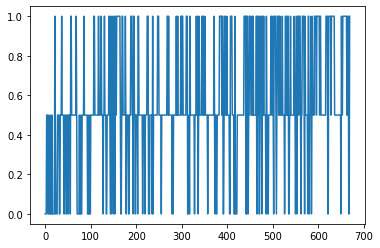

In [33]:
tmp = [np.fromstring(n[1:-1], dtype=np.float, sep=' ')  for n in train_frame["dqn_action"]]

plt.plot(tmp[ep*670:(ep+1)*670])

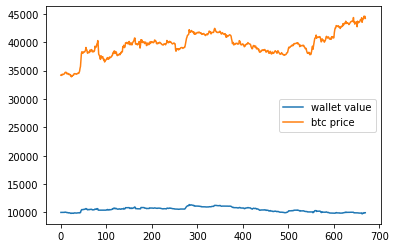

In [10]:
wallet = ep_frame['wallet_value'].values
btc = ep_frame['btc_price'].values

plt.plot(wallet[ep*670:(ep+1)*670], label='wallet value')
plt.plot(btc[ep*670:(ep+1)*670], label='btc price')
plt.legend()

Text(0.5, 1.0, 'Actions Episode: 2, Run: 5')

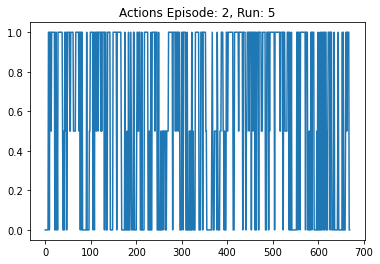

In [11]:
actions = ep_frame['action'].values
y = [ast.literal_eval(x)[0] for x  in actions]

plt.plot(y[ep*670:(ep+1)*670])
plt.title('Actions Episode: 2, Run: 5')